In [ ]:
import pandas as pd
import os
import random
from random import choice
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#data = pd.read_csv('/content/gdrive/MyDrive/scrap/attraction_reviews.csv')

In [ ]:
review = pd.read_csv('/content/gdrive/MyDrive/scrap/reviews_data.csv')
attract = pd.read_csv('/content/gdrive/MyDrive/scrap/attractions.csv')

In [ ]:
attract = attract[0:104]

In [ ]:
data = review.merge(attract, on='attraction_id')

In [ ]:
data.head(3)

,Unnamed: 0_x,image_user,user,info_user,type_review,review_date,review,rating_x,attraction_id,user_id,...,province,city,lien_detail,image,category,nbre_review,address,name,rating_y,price
0,0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0,0,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.0
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0,1,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.0
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,Rumzzz,"Irving, TX77 contributions",Spectacular,"January 6, 2024",One can never get enough of Central Park - the...,5.0,0,2,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13027 entries, 0 to 13026
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0_x   13027 non-null  int64  
 1   image_user     11840 non-null  object 
 2   user           13027 non-null  object 
 3   info_user      13027 non-null  object 
 4   type_review    13027 non-null  object 
 5   review_date    13027 non-null  object 
 6   review         13027 non-null  object 
 7   rating_x       13027 non-null  float64
 8   attraction_id  13027 non-null  int64  
 9   user_id        13027 non-null  int64  
 10  Unnamed: 0_y   13027 non-null  int64  
 11  country        13027 non-null  object 
 12  province       13027 non-null  object 
 13  city           13027 non-null  object 
 14  lien_detail    13027 non-null  object 
 15  image          13027 non-null  object 
 16  category       13027 non-null  object 
 17  nbre_review    13027 non-null  int64  
 18  addres

In [ ]:
data.columns

Index(['Unnamed: 0_x', 'image_user', 'user', 'info_user', 'type_review',
       'review_date', 'review', 'rating_x', 'attraction_id', 'user_id',
       'Unnamed: 0_y', 'country', 'province', 'city', 'lien_detail', 'image',
       'category', 'nbre_review', 'address', 'name', 'rating_y', 'price'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(13027, 22)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unnamed: 0_x        0
image_user       1187
user                0
info_user           0
type_review         0
review_date         0
review              0
rating_x            0
attraction_id       0
user_id             0
Unnamed: 0_y        0
country             0
province            0
city                0
lien_detail         0
image               0
category            0
nbre_review         0
address             0
name                0
rating_y            0
price               0
dtype: int64

In [ ]:
for item in data.columns:
    print(f'item:', item,',',type(data[item][0]))

item: Unnamed: 0_x , <class 'numpy.int64'>
item: image_user , <class 'str'>
item: user , <class 'str'>
item: info_user , <class 'str'>
item: type_review , <class 'str'>
item: review_date , <class 'str'>
item: review , <class 'str'>
item: rating_x , <class 'numpy.float64'>
item: attraction_id , <class 'numpy.int64'>
item: user_id , <class 'numpy.int64'>
item: Unnamed: 0_y , <class 'numpy.int64'>
item: country , <class 'str'>
item: province , <class 'str'>
item: city , <class 'str'>
item: lien_detail , <class 'str'>
item: image , <class 'str'>
item: category , <class 'str'>
item: nbre_review , <class 'numpy.int64'>
item: address , <class 'str'>
item: name , <class 'str'>
item: rating_y , <class 'numpy.float64'>
item: price , <class 'numpy.float64'>


In [ ]:
data.nunique()

Unnamed: 0_x     13027
image_user        3725
user              9048
info_user         7874
type_review      11248
review_date       3035
review           12721
rating_x             5
attraction_id      104
user_id           9048
Unnamed: 0_y       104
country              1
province             1
city                 1
lien_detail        104
image              104
category           104
nbre_review        102
address             24
name                53
rating_y             3
price               59
dtype: int64

In [ ]:

np.sort(data['rating_x'].unique())

array([1., 2., 3., 4., 5.])

In [ ]:
np.sort(data['user_id'].unique())

array([   0,    1,    2, ..., 9045, 9046, 9047])

In [ ]:
data[['user_id', 'attraction_id']].duplicated().sum()  #491 personnes on noté la meme attraction plus d'une fois

491

représente le nombre de personne ayant fait plus d'une notation

# Normaliser les données

In [ ]:
data[['user_id', 'attraction_id', 'rating_x']]

,user_id,attraction_id,rating_x
0,0,0,5.0
1,1,0,5.0
2,2,0,5.0
3,3,0,5.0
4,4,0,5.0
...,...,...,...
13022,9043,103,5.0
13023,9044,103,5.0
13024,9045,103,5.0
13025,9046,103,5.0


In [ ]:
data.groupby(['user_id', 'attraction_id']).agg({'rating_x': 'mean'}).reset_index()

,user_id,attraction_id,rating_x
0,0,0,5.0
1,0,31,4.0
2,1,0,5.0
3,1,67,5.0
4,2,0,5.0
...,...,...,...
12531,9043,103,5.0
12532,9044,103,5.0
12533,9045,103,5.0
12534,9046,103,5.0


# user base

In [ ]:
data_aggregated = data.groupby(['user_id', 'attraction_id']).agg({'rating_x': 'mean'}).reset_index()
user_rating_df = data_aggregated.pivot(index='user_id', columns='attraction_id', values='rating_x')


In [ ]:
data_aggregated.shape

(12536, 3)

In [ ]:
user_rating_df

attraction_id,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


La matrice de notes trX est de forme (9048, 104), donc 9048 utilisateurs notent 104 attractions.

In [ ]:
norm_user_rating = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating.values

In [ ]:

from collections import Counter
unique_ratings_count = dict(Counter(np.count_nonzero(trX, axis=1)))
unique_ratings_count

{2: 996,
 1: 7367,
 4: 144,
 6: 46,
 3: 338,
 11: 8,
 5: 58,
 9: 9,
 8: 16,
 7: 33,
 10: 11,
 23: 1,
 15: 5,
 27: 1,
 12: 6,
 19: 1,
 49: 1,
 33: 1,
 14: 2,
 18: 1,
 13: 3}

Chaque utilisateur a noté au maximum 49  attractions et le nombre moyen d'attractions notées par utilisateur est à peine supérieur à 13.

In [ ]:
user_counts = data['user_id'].value_counts()

# Obtenir l'ID du user ayant le plus de notes
user_id_max_notes = user_counts.idxmax()

print("L'ID du user ayant le plus de notes :", user_id_max_notes)

L'ID du user ayant le plus de notes : 285


In [ ]:
user_counts

285     80
999     62
138     41
283     36
634     28
        ..
3639     1
3638     1
3637     1
3636     1
9047     1
Name: user_id, Length: 9048, dtype: int64

In [ ]:
np.save('trX.npy', trX)

In [ ]:
trX[0:7]

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0.

# Définitions des paramètres des modèles

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
hiddenUnits = 20
visiblesUnits = len(norm_user_rating.columns)

In [ ]:
vb = tf.Variable(tf.zeros([visiblesUnits]), tf.float32) # number of unique attractions
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) # number of features we're going to learn
w = tf.Variable(tf.zeros([visiblesUnits, hiddenUnits]), tf.float32)

In [ ]:
v0 = tf.zeros([visiblesUnits], tf.float32)

tf.matmul([v0], w)

<tf.Tensor: shape=(1, 30), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
#phase 1: input processing
#defining a funtion to return o,ly the generated hidden states

def hidden_layer(v0_states, w, hb):
  h0_prob = tf.nn.sigmoid(tf.matmul([v0_states], w) + hb)
  h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
  return h0_state

h0 = hidden_layer(v0, w, hb)
print('first 15 hidden states: ', h0[0][0:15])


def reconstructed_output(h0_state, w, vb):
  v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(w)) + vb)
  v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
  return v1_state[0]


def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))


v1 = reconstructed_output(h0, w, vb)

print('hidden state shape: ', h0.shape)
print('v0 state shape: ', v0.shape)
print('v1 state shape: ', v1.shape)

first 15 hidden states:  tf.Tensor([1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 30)
v0 state shape:  (104,)
v1 state shape:  (104,)


# Entrainer le modèle

Epoch: 1 batch #: 499 of 18 sample #: 499 reconstruction error: 0.010385
Epoch: 1 batch #: 999 of 18 sample #: 499 reconstruction error: 0.254672
Epoch: 1 batch #: 1499 of 18 sample #: 499 reconstruction error: 0.003462
Epoch: 1 batch #: 1999 of 18 sample #: 499 reconstruction error: 0.006538
Epoch: 1 batch #: 2499 of 18 sample #: 499 reconstruction error: 0.016154
Epoch: 1 batch #: 2999 of 18 sample #: 499 reconstruction error: 0.003462
Epoch: 1 batch #: 3499 of 18 sample #: 499 reconstruction error: 0.009615
Epoch: 1 batch #: 3999 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 4499 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 4999 of 18 sample #: 499 reconstruction error: 0.019231
Epoch: 1 batch #: 5499 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 5999 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 6499 of 18 sample #: 499 reconstruction error: 0.000385
Epoch: 1 batch #: 6999 of 18 sample #: 4

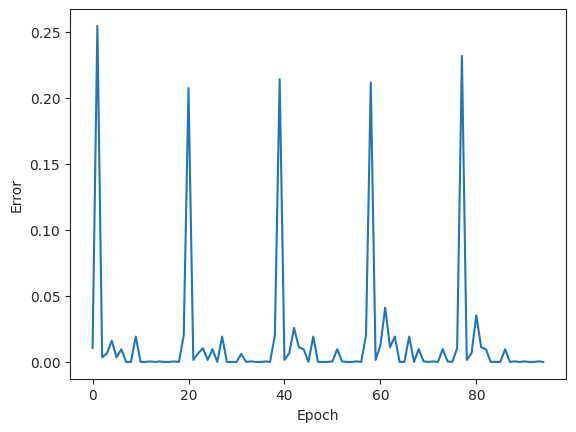

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def hidden_layer(v0_states, w, hb):
    v0_states_reshaped = tf.reshape(v0_states, [-1, visible_units])  # Assurez-vous que visible_units est correct
    h0_prob = tf.nn.sigmoid(tf.matmul(v0_states_reshaped, w) + hb)
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state


def reconstructed_output(h0_state, w, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(w)) + vb)
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))

epochs = 5
batchsize = 500
errors = []
weights = []  # Correction : remplacer 500 par une liste vide []
k = 1
alpha = 0.1

visible_units = len(trX[0])
hidden_units = 128  # Ajustez cela selon vos besoins

# Initialiser les poids et les biais
w = tf.Variable(tf.random.normal([visible_units, hidden_units], 0.01), dtype=tf.float32)
vb = tf.Variable(tf.zeros([visible_units]), dtype=tf.float32)
hb = tf.Variable(tf.zeros([hidden_units]), dtype=tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices(np.float32(trX)).batch(batchsize)

for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):
            v0_state = batch_x[i_sample]
            h0_state = hidden_layer(v0_state, w, hb)
            v1_state = reconstructed_output(h0_state, w, vb)
            h1_state = hidden_layer(v1_state, w, hb)

            delta_w = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

            w = w + alpha * delta_w
            vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
            hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

            if i_sample == len(batch_x) - 1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(w.numpy())

                print('Epoch: %d' % (epoch + 1),
                      "batch #: %i" % batch_number, "of %i" % (len(trX) / batchsize),
                      "sample #: %i" % i_sample,
                      'reconstruction error: %f' % err)

            batch_number += 1

plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()




In [ ]:
filename = 'model'

In [ ]:
np.save('w.npy', w)
np.save('hb.npy', hb)
np.save('vb.npy', vb)

Epoch: 1 batch #: 499 of 18 sample #: 499 reconstruction error: 0.000714
Epoch: 1 batch #: 999 of 18 sample #: 499 reconstruction error: 0.089237
Epoch: 1 batch #: 1499 of 18 sample #: 499 reconstruction error: 0.000377
Epoch: 1 batch #: 1999 of 18 sample #: 499 reconstruction error: 0.000683
Epoch: 1 batch #: 2499 of 18 sample #: 499 reconstruction error: 0.000766
Epoch: 1 batch #: 2999 of 18 sample #: 499 reconstruction error: 0.001460
Epoch: 1 batch #: 3499 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 3999 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 4499 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 4999 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 5499 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 5999 of 18 sample #: 499 reconstruction error: 0.000000
Epoch: 1 batch #: 6499 of 18 sample #: 499 reconstruction error: 0.000325
Epoch: 1 batch #: 6999 of 18 sample #: 4

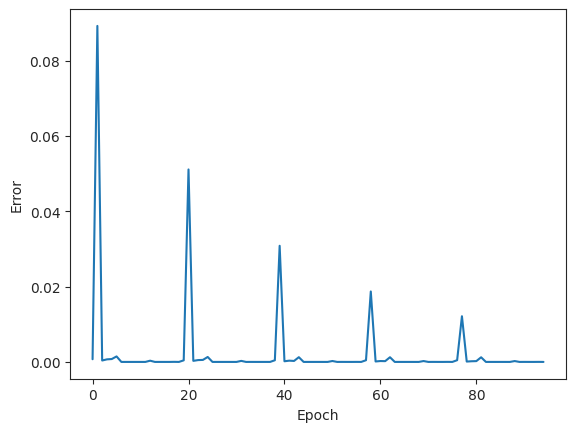

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction hidden_layer
def hidden_layer(v, w, b):
    return tf.nn.sigmoid(tf.matmul(v, w) + b)

# Définir la fonction reconstructed_output
def reconstructed_output(h, w, b):
    return tf.nn.sigmoid(tf.matmul(h, tf.transpose(w)) + b)


# Définir la fonction d'erreur
def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))

# Définir les paramètres
epochs = 5
batchsize = 500
errors = []
weights = []  # Correction: remplacer 500 par une liste vide []
k = 1
alpha = 0.1

# Définir le nombre d'unités pour la couche visible et cachée
visible_units = len(trX[0])  # Remplacez ceci par la taille de votre ensemble de données
hidden_units = 128

# Initialiser les poids et les biais
w = tf.Variable(tf.random.normal([visible_units, hidden_units], 0.01), dtype=tf.float32)
vb = tf.Variable(tf.zeros([visible_units]), dtype=tf.float32)
hb = tf.Variable(tf.zeros([hidden_units]), dtype=tf.float32)

# Convertir trX en float32
trX = np.float32(trX)

# Créer le dataset TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices(trX).batch(batchsize)

# Entraînement du modèle
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):
          for _ in range(k):
            v0_state = batch_x[i_sample]
            v0_state_reshaped = tf.reshape(v0_state, [1, -1])  # Redimensionner v0_state en une ligne (1D)

            h0_state = hidden_layer(v0_state_reshaped, w, hb)
            v1_state = reconstructed_output(h0_state, w, vb)
            h1_state = hidden_layer(v1_state, w, hb)

            delta_w = tf.matmul(tf.transpose(v0_state_reshaped), h0_state) - tf.matmul(tf.transpose(v1_state), h1_state)

            w = w + alpha * delta_w

            vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
            hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)
            v0_state = v1_state

            if i_sample == len(batch_x) - 1:
                err = error(v0_state_reshaped, v1_state)  # Utiliser v0_state_reshaped ici
                errors.append(err)
                weights.append(w.numpy())

                print('Epoch: %d' % (epoch + 1),
                      "batch #: %i" % batch_number, "of %i" % (len(trX) / batchsize),
                      "sample #: %i" % i_sample,
                      'reconstruction error: %f' % err)


            batch_number += 1

# Tracer les erreurs
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()


In [ ]:
np.save('w1.npy', w)
np.save('hb1.npy', hb)
np.save('vb1.npy', vb)

In [ ]:
prv_w = np.load('rbm_models/'+filename+'/w.npy')

## Recommandation
Nous pouvons désormais prédire les attractions qui pourraient plaire à un utilisateur arbitrairement sélectionné. Cela peut être accompli en introduisant les préférences de l'attraction regardé par l'utilisateur dans le RBM, puis en reconstruisant l'entrée. Les valeurs que nous donne le RBM tenteront d'estimer les préférences de l'utilisateur pour les attractions qu'il n'a pas visités en fonction des préférences des utilisateurs sur lesquels le RBM a été formé.

# créeons un utilisateur fictif

In [ ]:
userid = 999

In [ ]:
inputUser = trX[userid-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trX[userid - 1], "float32")

v0 = inputUser

print(v0)
#v0.shape

tf.Tensor(
[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ], shape=(104,), dtype=float32)


In [ ]:
v0test = tf.zeros([visiblesUnits], tf.float32)
v0test

<tf.Tensor: shape=(104,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>

In [ ]:
v0 = v0test

In [ ]:
#Nourrir l’utilisateur et reconstruire l’entrée

hh0 = tf.nn.sigmoid(tf.matmul([v0], w) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w)) + vb)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[1.03870516e-05 7.06036553e-06 9.40346581e-06 1.08970498e-05
 3.56865303e-06 1.07347596e-05 1.44372125e-05 1.00545158e-05
 6.63176706e-06 9.45016927e-06 1.31221373e-06 2.12527175e-05
 8.90990668e-06 7.92782521e-06 1.14625136e-05 1.79953404e-05
 9.26645953e-06 5.36289326e-06 1.74242505e-05 1.63044006e-05
 1.64026205e-05 1.07652186e-05 1.26832938e-05 5.79495281e-06
 1.20763652e-05 1.58265120e-05 5.48063281e-06 1.08979539e-05
 1.15085932e-05 2.77735398e-06 1.71951306e-05 1.53616220e-05
 2.63060119e-05 1.23237578e-05 8.11938116e-06 1.17394620e-05
 1.20144487e-05 1.12127163e-05 9.38011544e-06 1.41748487e-05
 7.73223110e-06 2.13038311e-05 1.69960531e-05 2.09089703e-05
 1.64207286e-05 6.43950841e-07 1.95387565e-05 9.36634115e-06
 2.70604742e-05 2.50408903e-05 1.19990582e-05 1.77869642e-05
 2.60087963e-05 1.74130055e-05 1.30249919e-05 1.19239994e-05
 3.78026721e-06 3.90114255e-05 2.10829658e-05 2.05854994e-05
 1.84653118e-06 2.80137501e-05 2.27817200e-05 2.67250798e-05
 2.01322473e-

In [ ]:
hh0

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[1.3788663e-04, 9.9955648e-01, 6.1579281e-04, 3.9581867e-04,
        7.5803349e-05, 7.8498197e-05, 2.7863495e-04, 3.6217459e-03,
        2.1984541e-05, 9.8098290e-01, 6.0307295e-03, 8.4072078e-04,
        1.0532218e-01, 1.3524541e-04, 1.8184171e-04, 5.9335743e-04,
        6.5045472e-04, 7.8049750e-05, 6.8578077e-04, 1.6746124e-02,
        1.7006388e-02, 2.2076965e-04, 7.7677885e-04, 2.0406496e-05,
        2.8624099e-02, 2.6203557e-05, 2.2471168e-03, 9.8883760e-01,
        1.9926444e-04, 7.0167363e-05, 9.8799610e-01, 6.3773897e-04,
        9.8400193e-01, 5.4502417e-03, 3.8525497e-04, 2.0594480e-03,
        1.5227214e-05, 9.8600924e-01, 2.7152488e-03, 3.4629769e-04,
        3.0874107e-03, 9.3352869e-03, 1.2358370e-05, 1.6426977e-05,
        1.3428413e-03, 1.3273912e-02, 2.1787511e-02, 1.5673665e-02,
        3.7145274e-04, 3.3825377e-04, 2.2927025e-02, 3.1468980e-03,
        2.4870603e-04, 1.8008674e-02, 1.8052014e-02, 9.1514009e-01

In [ ]:
user_rating_df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', name='attraction_id', length=104)

# liste des films recommandes pour les utilisateurs fictifs

In [ ]:
attraction_score = attract[attract['attraction_id'].isin(user_rating_df.columns)]


In [ ]:
attraction_score = attraction_score.assign(recommandationScore = rec[0])
attraction_score.sort_values(['recommandationScore'], ascending=False).head(10)

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price,recommandationScore
99,99,99,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,100. Park Avenue,442,"{'lat': 40.77041245, 'lng': -73.96220398}",Neighborhoods • Historic Walking Areas,4.5,75.0,0.000445
100,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.0,0.000350
97,97,97,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,98. Neil Simon Theatre,284,"{'lat': 40.75992584, 'lng': -73.98041534}",Theaters,4.5,112.0,0.000293
94,94,94,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,95. GhostBusters Firestation,437,"{'lat': 40.70780182, 'lng': -74.01190186}",Points of Interest & Landmarks,4.0,61.0,0.000261
91,91,91,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,92. SPYSCAPE,456,"{'lat': 40.71304703, 'lng': -74.00723267}",Military Museums • Speciality Museums,4.5,44.0,0.000193
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.0,0.000171
102,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,150.0,0.000161
93,93,93,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,94. Little Island,202,No Address Found,Parks,4.5,59.0,0.000158
95,95,95,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,96. Hayden Planetarium,421,"{'lat': 40.71304703, 'lng': -74.00723267}",Observatories & Planetariums,4.5,28.0,0.000146
98,98,98,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,99. Al Hirschfeld Theatre,249,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,72.0,0.000128


In [ ]:
attraction_score.shape

(104, 14)

In [ ]:
attract_def = data[data['user_id'] == userid]
attract_def.head()

,Unnamed: 0_x,image_user,user,info_user,type_review,review_date,review,rating_x,attraction_id,user_id,...,province,city,lien_detail,image,category,nbre_review,address,name,rating_y,price
1183,1163,https://dynamic-media-cdn.tripadvisor.com/medi...,Thomas V,"Oakland, CA16,492 contributions",Thank You Jackie O!,"May 31, 2023","It's like a gothic cathedral, spacious with so...",5.0,9,999,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,10. Grand Central Terminal,44731,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Architectural...,4.5,39.0
1260,1260,https://dynamic-media-cdn.tripadvisor.com/medi...,Thomas V,"Oakland, CA16,492 contributions",Nothing Like This in the World,"August 1, 2023",We enjoyed the view our of our temporary Brook...,5.0,10,999,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,11. Manhattan Skyline,21494,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks,5.0,39.0
1420,1420,https://dynamic-media-cdn.tripadvisor.com/medi...,Thomas V,"Oakland, CA16,496 contributions",Can Be Very Congested,"July 29, 2023",Well it can be super-crowded with all the tour...,3.0,11,999,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,12. Times Square,56782,"{'lat': 40.75992584, 'lng': -73.98041534}",Neighborhoods • Points of Interest & Landmarks,4.5,99.0
1756,1756,https://dynamic-media-cdn.tripadvisor.com/medi...,Thomas V,"Oakland, CA16,496 contributions",Urban Design at Its Best,"July 28, 2023",Each time I am in NY I make a visit to the Roc...,5.0,14,999,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,15. Rockefeller Center,25600,"{'lat': 40.75902939, 'lng': -73.97929382}",Points of Interest & Landmarks • Architectural...,4.5,99.0
2068,2068,https://dynamic-media-cdn.tripadvisor.com/medi...,Thomas V,"Oakland, CA16,496 contributions",The Roman Catholic Cathedral,"July 27, 2023",I stepped in and walked around while I was in ...,3.0,17,999,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,18. St. Patrick's Cathedral,15304,"{'lat': 40.71304703, 'lng': -74.00723267}",Churches & Cathedrals,4.5,75.0


In [ ]:
attract_def.shape

(62, 22)

# fusionnons les filmes regard& avec lez filmés predit

In [ ]:
merge_data_pred = attraction_score.merge(attract_def, on='attraction_id', how='outer')

In [ ]:
merge_data_pred.head(10)

,Unnamed: 0,attraction_id,country_x,province_x,city_x,lien_detail_x,image_x,category_x,nbre_review_x,address_x,...,province_y,city_y,lien_detail_y,image_y,category_y,nbre_review_y,address_y,name_y,rating_y,price_y
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,6. Broadway,31686,"{'lat': 40.75992584, 'lng': -73.98041534}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,7. Top of the Rock,80157,No Address Found,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,8. Brooklyn Bridge,25997,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,9. Statue of Liberty,44027,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,10. Grand Central Terminal,44731,"{'lat': 40.71304703, 'lng': -74.00723267}",...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,10. Grand Central Terminal,44731.0,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Architectural...,4.5,39.0


In [ ]:
merge_data_pred.shape

(133, 35)

In [ ]:
merge_data_pred['recommandationScore']

0      0.000010
1      0.000007
2      0.000009
3      0.000011
4      0.000004
         ...   
128    0.000350
129    0.000350
130    0.000171
131    0.000161
132    0.000004
Name: recommandationScore, Length: 133, dtype: float32

In [ ]:
merge_data_pred.sort_values(["recommandationScore"], ascending=False).head(20)

,Unnamed: 0,attraction_id,country_x,province_x,city_x,lien_detail_x,image_x,category_x,nbre_review_x,address_x,...,province_y,city_y,lien_detail_y,image_y,category_y,nbre_review_y,address_y,name_y,rating_y,price_y
126,99,99,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,100. Park Avenue,442,"{'lat': 40.77041245, 'lng': -73.96220398}",...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,100. Park Avenue,442.0,"{'lat': 40.77041245, 'lng': -73.96220398}",Neighborhoods • Historic Walking Areas,4.5,75.0
129,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277.0,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.0
127,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277.0,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.0
128,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277.0,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.0
124,97,97,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,98. Neil Simon Theatre,284,"{'lat': 40.75992584, 'lng': -73.98041534}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,94,94,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,95. GhostBusters Firestation,437,"{'lat': 40.70780182, 'lng': -74.01190186}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,91,91,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,92. SPYSCAPE,456,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,93,93,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,94. Little Island,202,No Address Found,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# item base

In [ ]:
trY = trX.T

In [ ]:
trY.shape

(104, 9048)

In [ ]:
norm_item_rating =norm_user_rating.T

In [ ]:
norm_item_rating.shape

(104, 9048)

In [ ]:
hiddenUnits = 20
visiblesUnits = len(norm_item_rating.columns)
visiblesUnits

9048

In [ ]:
vb = tf.Variable(tf.zeros([visiblesUnits]), tf.float32) # number of unique attractions
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) # number of features we're going to learn
w = tf.Variable(tf.zeros([visiblesUnits, hiddenUnits]), tf.float32)

In [ ]:
v0 = tf.zeros([visiblesUnits], tf.float32)

tf.matmul([v0], w)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#phase 1: input processing
#defining a funtion to return o,ly the generated hidden states

def hidden_layer(v0_states, w, hb):
  h0_prob = tf.nn.sigmoid(tf.matmul([v0_states], w) + hb)
  h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
  return h0_state

h0 = hidden_layer(v0, w, hb)
print('first 15 hidden states: ', h0[0][0:15])


def reconstructed_output(h0_state, w, vb):
  v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(w)) + vb)
  v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
  return v1_state[0]


def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))


v1 = reconstructed_output(h0, w, vb)

print('hidden state shape: ', h0.shape)
print('v0 state shape: ', v0.shape)
print('v1 state shape: ', v1.shape)

first 15 hidden states:  tf.Tensor([0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:  (9048,)
v1 state shape:  (9048,)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction hidden_layer
def hidden_layer(v, w, b):
    return tf.nn.sigmoid(tf.matmul(v, w) + b)

# Définir la fonction reconstructed_output
def reconstructed_output(h, w, b):
    return tf.nn.sigmoid(tf.matmul(h, tf.transpose(w)) + b)


# Définir la fonction d'erreur
def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))

# Définir les paramètres
epochs = 5
batchsize = 500
errors = []
weights = []  # Correction: remplacer 500 par une liste vide []
k = 1
alpha = 0.1

# Définir le nombre d'unités pour la couche visible et cachée
visible_units = len(trY[0])  # Remplacez ceci par la taille de votre ensemble de données
hidden_units = 128

# Initialiser les poids et les biais
w = tf.Variable(tf.random.normal([visible_units, hidden_units], 0.01), dtype=tf.float32)
vb = tf.Variable(tf.zeros([visible_units]), dtype=tf.float32)
hb = tf.Variable(tf.zeros([hidden_units]), dtype=tf.float32)

# Convertir trX en float32
trY = np.float32(trY)

# Créer le dataset TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices(trY).batch(batchsize)

# Entraînement du modèle
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):
          for _ in range(k):
            v0_state = batch_x[i_sample]
            v0_state_reshaped = tf.reshape(v0_state, [1, -1])  # Redimensionner v0_state en une ligne (1D)

            h0_state = hidden_layer(v0_state_reshaped, w, hb)
            v1_state = reconstructed_output(h0_state, w, vb)
            h1_state = hidden_layer(v1_state, w, hb)

            delta_w = tf.matmul(tf.transpose(v0_state_reshaped), h0_state) - tf.matmul(tf.transpose(v1_state), h1_state)

            w = w + alpha * delta_w

            vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
            hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)
            v0_state = v1_state

            if i_sample == len(batch_x) - 1:
                err = error(v0_state_reshaped, v1_state)  # Utiliser v0_state_reshaped ici
                errors.append(err)
                weights.append(w.numpy())

                print('Epoch: %d' % (epoch + 1),
                      "batch #: %i" % batch_number, "of %i" % (len(trX) / batchsize),
                      "sample #: %i" % i_sample,
                      'reconstruction error: %f' % err)


            batch_number += 1

# Tracer les erreurs
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()


Epoch: 1 batch #: 103 of 18 sample #: 103 reconstruction error: 0.042129
Epoch: 2 batch #: 103 of 18 sample #: 103 reconstruction error: 0.023784
Epoch: 3 batch #: 103 of 18 sample #: 103 reconstruction error: 0.016845


In [ ]:
itemid = 100

In [ ]:
inputUser = trY[itemid-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trY[itemid - 1], "float32")

v0 = inputUser

print(v0)

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(9048,), dtype=float32)


In [ ]:
#Nourrir l’utilisateur et reconstruire l’entrée

hh0 = tf.nn.sigmoid(tf.matmul([v0], w) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w)) + vb)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor([0.00345966 0.01856782 0.06643497 ... 0.04179356 0.00589444 0.01442472], shape=(9048,), dtype=float32)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json: 100%|██████████| 338/338 [00:00<00:00, 168kB/s]
c:\Users\Michel\scrap\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Michel\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
vocab.txt: 100%|███████

In [ ]:
def infrerence(text):
    try:
        inputs = tokenizer(text, return_tensors="pt")
        outputs = model(**inputs)
        return torch.argmax(outputs.logits, dim=1).item()
    except:
        try:
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            return torch.argmax(outputs.logits, dim=1).item()
        except:
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            return torch.argmax(outputs.logits, dim=1).item()



In [ ]:
infrerence("Very well done. Very sad but something we all must go and see and remember the innocent people and brave first responders that died for no reason, except for pure evil and hatred.")

0

In [ ]:
data['sentiment_labels'] = data['text_review'].apply(infrerence)

In [ ]:
data['sentiment_labels']

0        2
1        2
2         
3        2
4        2
        ..
12694    2
12695    1
12696    2
12697    2
12698    2
Name: sentiment_labels, Length: 12699, dtype: object

In [ ]:
data.to_csv('data_sentiment.csv')

In [ ]:
data_sentiment = pd.read_csv('data_sentiment.csv')

In [ ]:
data_sentiment.head()

,Unnamed: 0,image_user,name_user,info_user,type_review,date_review,text_review,score_user,attraction_id,sentiment_labels
0,0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0,2.0
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0,2.0
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,Rumzzz,"Irving, TX77 contributions",Spectacular,"January 6, 2024",One can never get enough of Central Park - the...,5.0,0,NaN
3,3,https://dynamic-media-cdn.tripadvisor.com/medi...,A Ruiz,"Lahaina, HI56 contributions",Awesome experience!,"December 30, 2023",Carriage ride around the park with historical ...,5.0,0,2.0
4,4,https://dynamic-media-cdn.tripadvisor.com/medi...,BeakerTX,"San Antonio, TX572 contributions",It's a park!,"December 28, 2023",Nice family stroll through the southern part o...,5.0,0,2.0


In [ ]:
data_sentiment['attraction_id'].isnull().sum()

0

In [ ]:
data_sentiment.groupby('score_user')['score_user'].agg(['count'])

,count
score_user,
1.0,320
2.0,288
3.0,836
4.0,2954
5.0,8301


In [ ]:
data_sentiment.isnull().sum()[1]

C:\Users\Michel\AppData\Local\Temp\ipykernel_18800\2034617029.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_sentiment.isnull().sum()[1]


1167

In [ ]:
data_sentiment['attraction_id'].count()

12699

C:\Users\Michel\AppData\Local\Temp\ipykernel_18800\3786331456.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


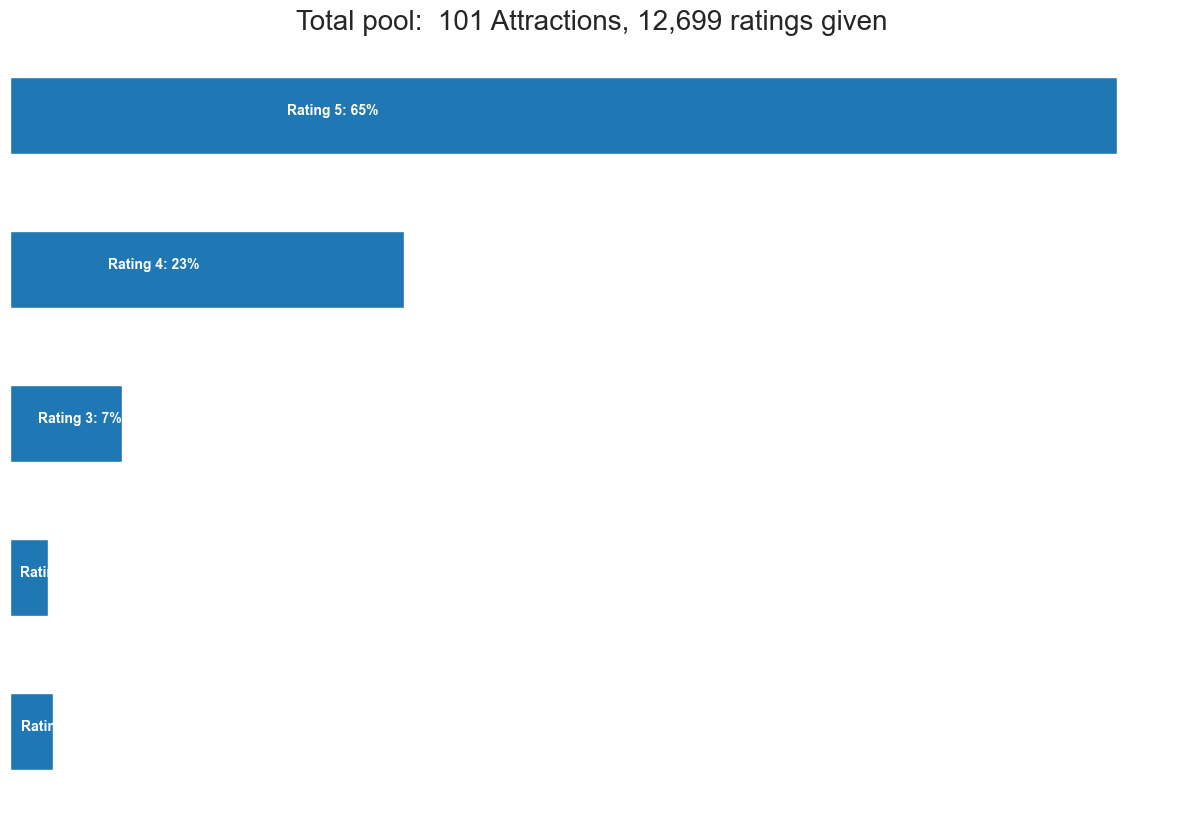

In [ ]:
p = data_sentiment.groupby('score_user')['score_user'].agg(['count'])


# get Attraction count
cust_count = data_sentiment['attraction_id'].nunique()

# get rating count
rating_count = data_sentiment['attraction_id'].count()

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool:  {:,} Attractions, {:,} ratings given'.format(cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

On constate que la note tend à être relativement positive (>3). Cela peut être dû au fait que les clients mécontents ont tendance à partir au lieu de faire des efforts pour évaluer. Nous pouvons garder cela à l’esprit : les filattractionsms peu bien notés signifient qu’ils sont généralement très mauvais.

In [ ]:
f = ['count','mean']

df_movie_summary = data_sentiment.groupby('attraction_id')['score_user'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))



Movie minimum times of review: 140.0


In [ ]:
data_sentiment.groupby('attraction_id')['score_user'].agg(f)

,count,mean
attraction_id,,
0,110,4.709091
1,130,4.746154
2,150,4.513333
3,120,4.158333
4,120,4.650000
...,...,...
96,140,4.585714
97,130,4.184615
98,120,4.375000
